In [53]:
#import all necessary packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# load the dataset 
df = pd.read_csv('weather_data_extended.csv')

In [55]:
# view some of the dataset 
df.head()

,Location,Temperature (°C),Feels Like (°C),Humidity (%),Wind Speed (kph),Cloud Cover (%),Pressure (mb),UV Index,Visibility (km)
0,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16
1,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16
2,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16
3,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16
4,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16


In [56]:
# do some exploratory data analysis 
df.describe()


,Temperature (°C),Feels Like (°C),Humidity (%),Wind Speed (kph),Cloud Cover (%),Pressure (mb),UV Index,Visibility (km)
count,800.00000,800.000000,798.000000,798.000000,800.000000,798.000000,800.000000,800.000000
mean,16.53750,16.312500,73.379699,16.165664,43.750000,1013.017544,1.750000,10.750000
std,5.58223,7.397601,16.566658,10.333199,34.820297,7.615259,1.090406,1.985555
min,8.30000,4.500000,40.000000,3.600000,0.000000,900.000000,1.000000,10.000000
25%,13.75000,12.375000,65.500000,6.275000,0.000000,1012.000000,1.000000,10.000000
50%,15.50000,15.900000,74.000000,9.000000,62.500000,1013.000000,1.000000,10.000000
75%,20.25000,20.625000,85.750000,24.100000,75.000000,1019.250000,2.250000,10.000000
max,25.00000,27.800000,100.000000,29.900000,75.000000,1024.000000,4.000000,16.000000


In [57]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Location          800 non-null    object 
 1   Temperature (°C)  800 non-null    float64
 2   Feels Like (°C)   800 non-null    float64
 3   Humidity (%)      798 non-null    float64
 4   Wind Speed (kph)  798 non-null    float64
 5   Cloud Cover (%)   800 non-null    int64  
 6   Pressure (mb)     798 non-null    float64
 7   UV Index          800 non-null    int64  
 8   Visibility (km)   800 non-null    int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 56.4+ KB


In [58]:
df.isna().sum()


Location            0
Temperature (°C)    0
Feels Like (°C)     0
Humidity (%)        2
Wind Speed (kph)    2
Cloud Cover (%)     0
Pressure (mb)       2
UV Index            0
Visibility (km)     0
dtype: int64

In [59]:
#drop rows with null values
df = df.dropna()

In [60]:
df.isnull().sum()
df['Location_index'] = df['Location'].astype('category').cat.codes
df.head()

,Location,Temperature (°C),Feels Like (°C),Humidity (%),Wind Speed (kph),Cloud Cover (%),Pressure (mb),UV Index,Visibility (km),Location_index
0,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16,3
1,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16,3
2,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16,3
3,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16,3
4,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16,3


In [61]:
#drop non-numeric rows 
dfnumeric = df.drop("Location", axis=1)

In [62]:
import seaborn as sns

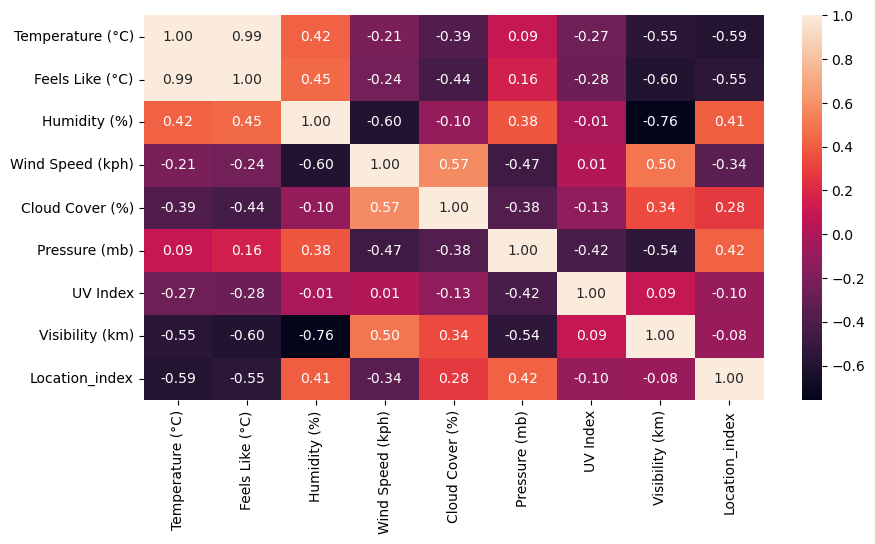

In [63]:
#Do correction analysis of the dataset 
corr = dfnumeric.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr, fmt= '.2f', annot=True)
plt.show()

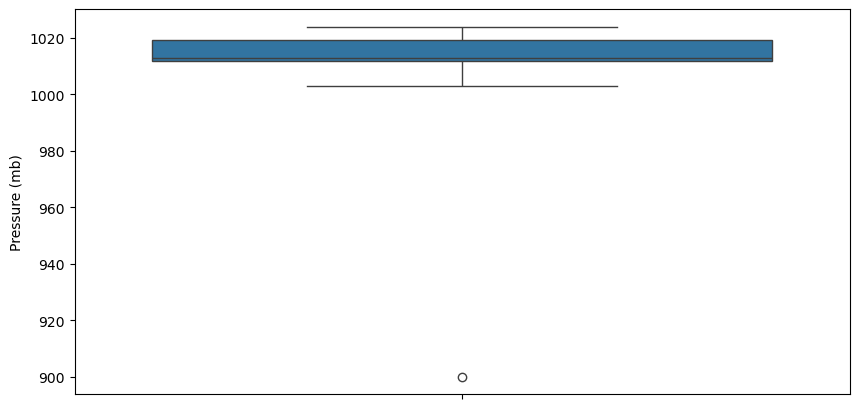

In [64]:
# plot boxplot for the distribution of the pressure column of the dataset 
plt.figure(figsize=(10,5))
sns.boxplot(data=df['Pressure (mb)'])
plt.show()

In [65]:
#design a ml model for the database 
X=dfnumeric.drop("Temperature (°C)", axis=1)
y=dfnumeric['Temperature (°C)']
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_s = scaler.fit_transform(X)

In [66]:
#split the data in train, test sets 
from sklearn.model_selection import train_test_split, KFold, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X_s, y, test_size=0.2, random_state=40)

In [67]:
#calculate the performance of the models
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error as mse
models = {'lr':LinearRegression(), 'lasso':Lasso(alpha=0.01), 'dt':DecisionTreeRegressor()}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    er = mse(y_test, y_pred)
    results[name] = {'R2 Score':r2, 'MSE':er}

In [68]:
# Convert results to DataFrame and display
results_df = pd.DataFrame(results).T
print(results_df)

       R2 Score           MSE
lr     1.000000  5.104277e-29
lasso  0.998784  3.103938e-02
dt     1.000000  2.500540e-30


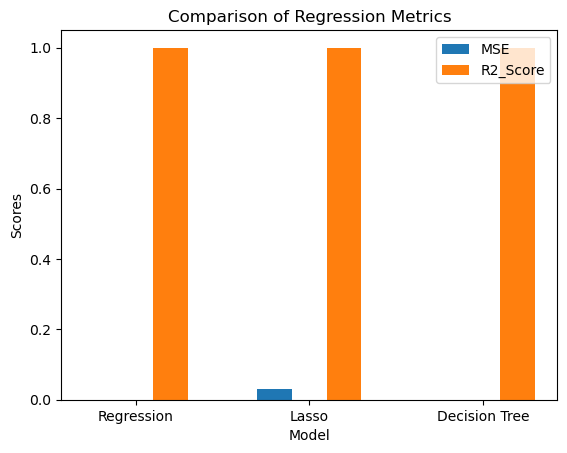

In [69]:
mse = results_df['MSE']
r2_score = results_df['R2 Score']

positions = np.arange(len(mse))
bar_width = 0.2

plt.bar(positions - bar_width, mse, width = bar_width, label = 'MSE')
plt.bar(positions + bar_width, r2_score, width = bar_width, label = 'R2_Score')

# adding labels and title
plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Comparison of Regression Metrics')

# adding the legend
plt.legend()
plt.xticks(positions, ['Regression', 'Lasso', 'Decision Tree'])
plt.show()